In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math

Para ejecutar correctamente este archivo, es necesario hacer _"pip install -r requirements.txt"_ con el fichero de texto que se puede encontrar al mismo nivel que este archivo (_AnalisisEventos.ipynb).

Para analizar nuevos datos o añadir nuevas trazas, se deben colocar los archivos (.JSON) en el directorio "Eventos", que se encuentra al mismo nivel que este archivo (AnalisisEventos.ipynb).

Para generar nuevas trazas de juego, se puede jugar desde el editor de Unity o desde la Build (directorio "BuildTracker"). Se generarán las trazas en un directorio "TrackerOutputs" al mismo nivel que el .exe en el caso de la Build, o de la solución de Visual Studio en el caso del editor de Unity.

In [2]:
directorio = "./Eventos/"
dataframes = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(directorio, archivo)
        # Lee el archivo y lo agrega a la lista de DataFrames
        # df = pd.read_csv(ruta_archivo)
        df = pd.read_json(ruta_archivo)
        dataframes.append(df)
        
dataset_completo = pd.concat(dataframes, ignore_index=True)

dataset_normalizado = pd.json_normalize(dataset_completo['Events'])

dataset_final = pd.concat([dataset_completo.drop(columns=['Events']), dataset_normalizado], axis=1)
dataset_final = dataset_final.dropna(subset=['Event_ID'])
dataset_final

,Event_ID,Event_Type,Session_ID,Timestamp,CurrentLevel
0,5464b97d-306d-473e-977b-a2bdc8bfbe9e,SessionStartEvent,a52691db-134d-46a3-b4e3-1384567c7918,1.713881e+09,NaN
1,64f6bad4-bced-4a83-887c-f6bafba6843a,InitLevelEvent,a52691db-134d-46a3-b4e3-1384567c7918,1.713881e+09,1.0
2,ae8728fb-23d3-4e14-9125-e5172d7a3806,ClickUIRabbitEvent,a52691db-134d-46a3-b4e3-1384567c7918,1.713881e+09,1.0
3,056bd9ff-2487-49dc-b460-61aeb3947a75,ClickUIRabbitEvent,a52691db-134d-46a3-b4e3-1384567c7918,1.713881e+09,1.0
4,3aa3b8d4-9c96-4897-ba49-2b1e8233153e,ClickBornEvent,a52691db-134d-46a3-b4e3-1384567c7918,1.713881e+09,1.0
...,...,...,...,...,...
768,87a565ac-7136-4404-91bf-e10e6f1ae54f,ClickBornEvent,3e0c5904-fb14-401e-9bc0-8fa815ad229d,1.713973e+09,2.0
769,7959cf4a-733e-43c3-b755-0d07c327255c,ClickGoEvent,3e0c5904-fb14-401e-9bc0-8fa815ad229d,1.713973e+09,2.0
770,7fe8c61e-b727-43d2-b804-6d95b93e3fd3,EndLevelEvent,3e0c5904-fb14-401e-9bc0-8fa815ad229d,1.713973e+09,2.0
771,27b07be9-cd46-4737-b34a-4d35e25b4d33,InitLevelEvent,3e0c5904-fb14-401e-9bc0-8fa815ad229d,1.713973e+09,3.0


# Distribución de las veces que hace click un jugador sobre un conejo no nacido en cada nivel.


In [3]:
def count_click_ranges(level_data):
    counts = {'0-2': 0, '3-5': 0, '6+': 0}
    for value in level_data:
        if value < 3:
            counts['0-2'] += 1
        elif value < 6:
            counts['3-5'] += 1
        else:
            counts['6+'] += 1
    return counts

                                      1.0  2.0  3.0  4.0  5.0  6.0
Session_ID                                                        
a52691db-134d-46a3-b4e3-1384567c7918  2.0  1.0  3.0  0.0  0.0  0.0
2bee8693-86db-4787-9cdb-14e3a884571a  0.0  0.0  0.0  1.0  3.0  4.0
e68c4016-6732-42df-a90f-3c489b10b0d0  1.0  1.0  1.0  7.0  3.0  3.0
d90343a9-f1e3-40b7-99f0-143e20b766f4  1.0  1.0  1.0  0.0  0.0  1.0
ddcd4d9a-33dd-42b5-84e1-3e647c60fe68  0.0  0.0  0.0  1.0  0.0  0.0
9eeafb68-37a6-4012-b887-139341e41c1e  0.0  0.0  0.0  0.0  0.0  0.0
3940891a-31d8-4233-8442-ed1fe35550ae  1.0  1.0  1.0  0.0  0.0  0.0
9222bb81-d769-4389-9c46-c2af15efc87a  0.0  0.0  0.0  0.0  0.0  0.0
1620dd1d-c62c-4931-82da-7b6d8d46db23  2.0  0.0  0.0  1.0  0.0  0.0
57e67c96-0dae-4639-855e-8fc16640b08b  0.0  0.0  0.0  0.0  0.0  0.0
2bd2cb19-8dbf-4d4e-8bfc-5269bf21914b  0.0  0.0  1.0  1.0  0.0  0.0
c91c1dc2-b793-49a2-8663-d2470b8bdd90  1.0  0.0  0.0  0.0  0.0  0.0
9c5758e4-3c99-4034-a451-36791b040c43  4.0  1.0  2.0  0.0  0.0 

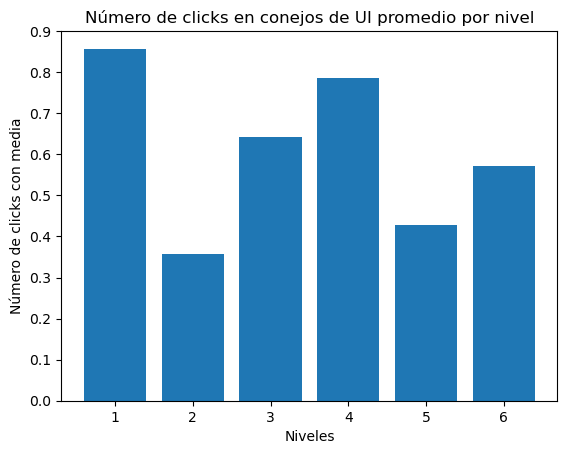

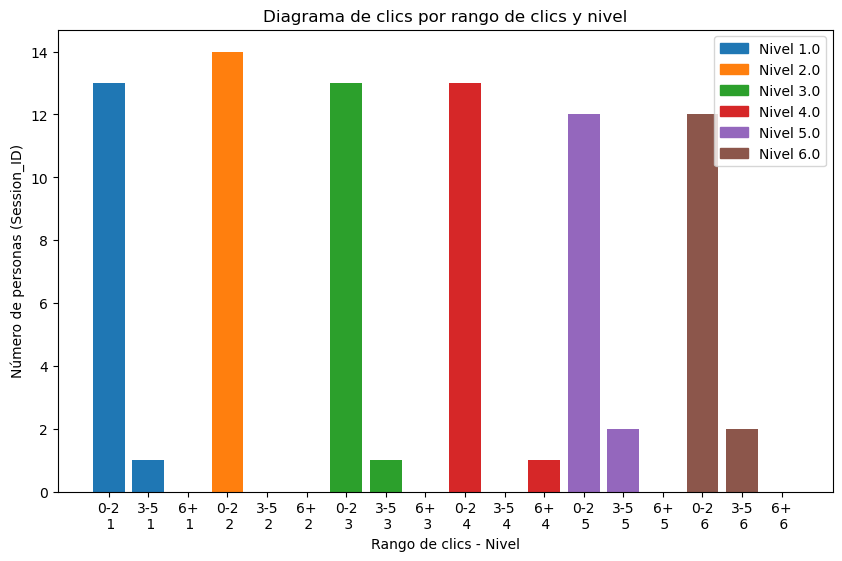

In [4]:
# Creamos una tabla que contiene el número de clicks que cada usuario ha hecho en cada nivel del 
click_events = dataset_final[dataset_final['Event_Type'] == 'ClickUIRabbitEvent']
pivot_table = pd.pivot_table(click_events, index='Session_ID', columns='CurrentLevel', aggfunc='size', fill_value=0)
all_session_ids = dataset_final['Session_ID'].unique()
all_session_ids_df = pd.DataFrame(all_session_ids, columns=['Session_ID'])
all_session_ids_df.set_index('Session_ID', inplace=True)
result = all_session_ids_df.join(pivot_table)
result.fillna(0, inplace=True)

print(result)

mean_clicks = result.iloc[:, 0:].mean()

# Graficar
plt.bar(mean_clicks.index.astype(float), mean_clicks.values)
plt.xlabel('Niveles')
plt.ylabel('Número de clicks con media')
plt.title('Número de clicks en conejos de UI promedio por nivel')
plt.xticks(mean_clicks.index.astype(float))
plt.show()


# Graficar histogramas para cada nivel
colors = plt.cm.tab10.colors  # Colores para cada nivel
plt.figure(figsize=(10, 6))  # Tamaño de la figura
legend_patches = []
for i, level in enumerate(result.columns):
    counts = count_click_ranges(result[level])
    plt.bar([f'{range_}\n {math.trunc(level)}' for range_ in counts.keys()], counts.values(), color=colors[i])
    legend_patches.append(Patch(color=colors[i], label=f'Nivel {level}'))
plt.xlabel('Rango de clics - Nivel')
plt.legend(handles=legend_patches)
plt.ylabel('Número de personas (Session_ID)')
plt.title('Diagrama de clics por rango de clics y nivel')
plt.show()

Esta métrica nos ayuda a ver si el jugador ha entendido que no se puede alterar el orden de creación de conejos en el juego y que no se pueden spawnear los conejos de alguna forma diferente a pulsar el botón “Born”.

Como podemos observar en los gráficos, hay una tendencia a hacer click en los conejos de la UI, sobre todo en los primeros niveles. Esto nos indica que los jugadores intentan realizar alguna acción con el uso del click sobre esta zona de la pantalla, cuando esto no es posible. Significa que no es suficientemente clara o intuitiva la forma de spawnear, puesto que están intentando hacer uso de otro medio para hacerlo.

Sin embargo, observamos que conforme avanzan los niveles, baja el número de clicks por usuario. Esto nos indica que los jugadores van aprendiendo que el click sobre los conejos de la UI no aporta ninguna funcionalidad, dejando de hacer uso de esta mecánica inexistente sin que el juego tenga que intervenir.

# Distribución de las veces que hacen clicks los jugadores sobre un conejo ya spawneado en cada nivel.

                                      1.0  2.0  3.0  4.0  5.0  6.0
Session_ID                                                        
a52691db-134d-46a3-b4e3-1384567c7918  1.0  0.0  0.0  4.0  0.0  0.0
2bee8693-86db-4787-9cdb-14e3a884571a  0.0  1.0  0.0  0.0  8.0  4.0
e68c4016-6732-42df-a90f-3c489b10b0d0  0.0  0.0  0.0  0.0  2.0  2.0
d90343a9-f1e3-40b7-99f0-143e20b766f4  0.0  0.0  0.0  0.0  0.0  0.0
ddcd4d9a-33dd-42b5-84e1-3e647c60fe68  0.0  0.0  2.0  0.0  2.0  5.0
9eeafb68-37a6-4012-b887-139341e41c1e  0.0  0.0  0.0  0.0  0.0  0.0
3940891a-31d8-4233-8442-ed1fe35550ae  1.0  0.0  0.0  0.0  0.0  0.0
9222bb81-d769-4389-9c46-c2af15efc87a  4.0  1.0  1.0  1.0  0.0  0.0
1620dd1d-c62c-4931-82da-7b6d8d46db23  0.0  0.0  0.0  0.0  0.0  0.0
57e67c96-0dae-4639-855e-8fc16640b08b  0.0  2.0  1.0  0.0  0.0  0.0
2bd2cb19-8dbf-4d4e-8bfc-5269bf21914b  2.0  4.0  2.0  0.0  0.0  0.0
c91c1dc2-b793-49a2-8663-d2470b8bdd90  2.0  2.0  0.0  0.0  0.0  0.0
9c5758e4-3c99-4034-a451-36791b040c43  0.0  0.0  0.0  0.0  0.0 

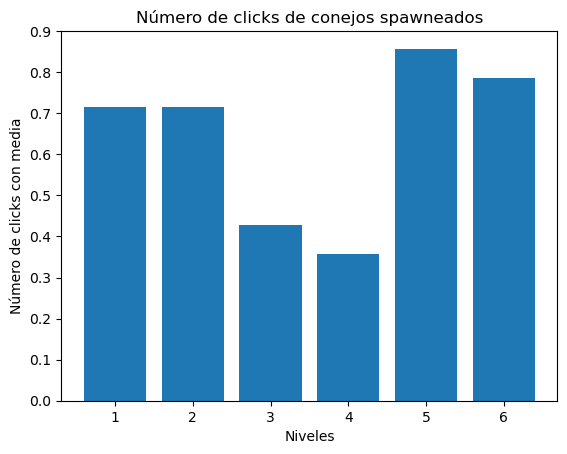

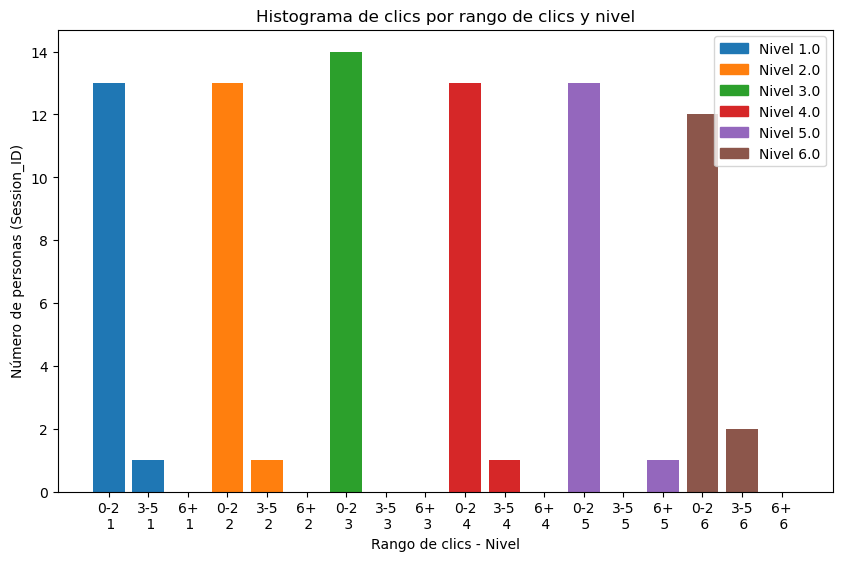

In [5]:
# Creamos una tabla que contiene el número de clicks que cada usuario ha hecho en cada nivel del 
click_events = dataset_final[dataset_final['Event_Type'] == 'ClickSpawnedRabbitEvent']
pivot_table = pd.pivot_table(click_events, index='Session_ID', columns='CurrentLevel', aggfunc='size', fill_value=0)
all_session_ids = dataset_final['Session_ID'].unique()
all_session_ids_df = pd.DataFrame(all_session_ids, columns=['Session_ID'])
all_session_ids_df.set_index('Session_ID', inplace=True)
result = all_session_ids_df.join(pivot_table)
result.fillna(0, inplace=True)

print(result)

mean_clicks = result.iloc[:, 0:].mean()

# Graficar
plt.bar(mean_clicks.index.astype(float), mean_clicks.values)
plt.xlabel('Niveles')
plt.ylabel('Número de clicks con media')
plt.title('Número de clicks de conejos spawneados')
plt.xticks(mean_clicks.index.astype(float))
plt.show()


# Graficar histogramas para cada nivel
colors = plt.cm.tab10.colors  # Colores para cada nivel
plt.figure(figsize=(10, 6))  # Tamaño de la figura
legend_patches = []
for i, level in enumerate(result.columns):
    counts = count_click_ranges(result[level])
    plt.bar([f'{range_}\n {math.trunc(level)}' for range_ in counts.keys()], counts.values(), color=colors[i])
    legend_patches.append(Patch(color=colors[i], label=f'Nivel {level}'))
plt.xlabel('Rango de clics - Nivel')
plt.legend(handles=legend_patches)
plt.ylabel('Número de personas (Session_ID)')
plt.title('Histograma de clics por rango de clics y nivel')
plt.show()


Esta métrica nos ayuda a ver si el jugador ha entendido que tras spawnear un conejo, no se pueden mover los anteriores.
De nuevo, como podemos observar en los gráficos, hay una tendencia a hacer click en los conejos ya spawneados, sobre todo en los primeros niveles. Esto nos indica que los jugadores intentan realizar alguna acción con el uso del click sobre estos conejos, cuando esto no es posible.

Vuelve a ocurrir que conforme avanzan los niveles, baja el número de clicks por usuario. Esto nos indica que los jugadores van aprendiendo que el click sobre los conejos ya spawneados no aporta ninguna funcionalidad.

Sin embargo, podemos observar que para niveles más avanzados, y por lo tanto más difíciles, el número de clicks tiene una ligera subida para algunos usuarios. Esto puede indicar que cuando el jugador se siente atascado en un nivel, vuelve a intentar hacer uso de estas mecánicas inexistentes en busca de una solución.

**Preguntas de investigación:**
- ¿El jugador entiende cómo se deben mover los conejos?
Sí. Aunque observamos clicks en lugares donde no debería haberlos, también podemos ver que los usuarios avanzan en los niveles y usan los botones adecuados que el juego requiere. Es decir, entienden cómo se juega a pesar de que puedan intentar utilizar mecánicas que realmente no les sirven para avanzar. Se podría mejorar este aspecto para que no exista una confusión de las mecánicas reales con las inexistentes.

- ¿El jugador entiende el orden de creación en el juego del nacimiento de los conejos?
Sí. De manera similar a la pregunta anterior, los jugadores lo entienden pues avanzan en los niveles y no se quedan atascados. Aunque para algunos casos, cuando los jugadores hacían muchos clicks en los conejos de la interfaz, la mecánica no quedaba clara desde el principio. Se debe mejorar para evitar esta confusión inicial.

- ¿Entiende que una vez spawneado el siguiente conejo, no puede mover el anterior?
Sí. Se repite la misma lógica que para la cuestión anterior. Observamos que en primer lugar puede haber una confusión directamente relacionada con el número de clicks realizados en los conejos ya spawneados, pero conforme avanzan los niveles esta se reduce.

**Conclusiones:**

Aunque los jugadores consiguen avanzar en el juego, vemos que con frecuencia hacen clicks de ratón en lugares que no les aportan ningún funcionamiento dentro del juego. Aunque no obtengan feedback de estos clicks, en ocasiones los usuarios insisten en ellos, exponiendo un posible error de interfaz por parte del juego.

Esta "falsa mecánica" que muchos usuarios intentan utilizar va decreciendo conforme aumentan los niveles. Esto es positivo, pues indica que los jugadores entienden mejor la jugabilidad y mecánicas conforme avanzan en el juego. Sin embargo, un aspecto observado es que cuando se llega a un punto de dificultad en el juego, los clicks vuelven a aparecer, indicándonos que algunos jugadores no han descartado por completo el uso de esta falsa mecánica.
